nan
153627
0
Index(['PurchasePrice', 'AreaLiving', 'Rooms', 'Longitude', 'gde_tax',
       'gde_pop_per_km2', 'RealEstateTypeId', 'gde_area_settlement_percentage',
       'AreaProperty', 'Zip', 'TravelTimeMiv', 'BuiltYear', 'gde_population',
       'Latitude', 'gde_politics_pda', 'gde_area_forest_percentage',
       'ForestDensityL', 'gde_empty_apartments', 'gde_social_help_quota'],
      dtype='object')
931349.470172691
785000.0


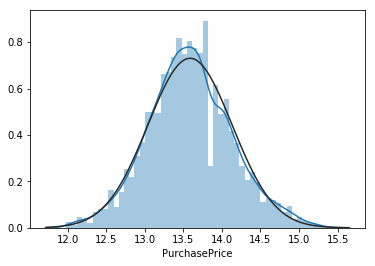

<Figure size 432x288 with 0 Axes>

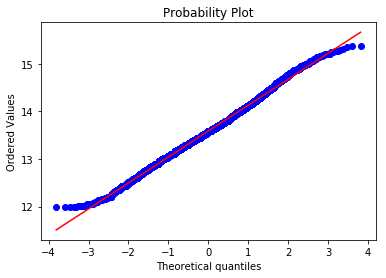

<Figure size 432x288 with 0 Axes>

In [7]:
#Data Visualization
import sklearn
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import  norm

data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)

X = Data[['PurchasePrice','AreaLiving','Rooms', 'Longitude','gde_tax','gde_pop_per_km2',
         'RealEstateTypeId','gde_area_settlement_percentage','AreaProperty','Zip','TravelTimeMiv',
          'BuiltYear','gde_population','Latitude','gde_politics_pda','gde_area_forest_percentage',
         'ForestDensityL','gde_empty_apartments','gde_social_help_quota']]
tax = np.array(Data['TravelTimeMiv'])
maxvalue = np.min(tax)
print(maxvalue)
print(len(tax))
tax1  = [i for i in tax if i>4]
#value of x
print(len(tax1))
#X['PurchasePrice'] = np.log1p(X['PurchasePrice'])
#X['AreaLiving'] = np.log1p(X['AreaLiving'])
numeric_feats = X.dtypes[X.dtypes != "object"].index
print(numeric_feats)
mean = np.mean(X['PurchasePrice'])
print(mean)
median = np.median(X['PurchasePrice'])
print(median)

X= pd.get_dummies(X)
X = X.fillna(X.mean())



names = X.columns
N_columns = len(names)

#Choose a random smaple of N of each data column for plotting. 
N = 10000
dataX = np.array(X)
pairs = list(zip(dataX))
X1 = random.sample(pairs, N)
dataX_small = np.array(X1)
dataX_small = dataX_small.reshape(N,N_columns)

#Build a small dataframe for the plot. 
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['PurchasePrice'].value_counts()
dataframe['PurchasePrice'].isnull().sum()
dataframe['PurchasePrice'] = np.log1p(dataframe['PurchasePrice'])
sns.distplot(dataframe['PurchasePrice'], fit=norm)
plt.show()
plt.savefig(r"PurchasePrice_his.png")
fig = plt.figure()
#plt.figsize=(0, 20)
res = stats.probplot(dataframe['PurchasePrice'], plot=plt)
plt.show()
plt.savefig(r"PurchasePrice_stats.png")


intercept: -19.59246662751024
slope: [77.81616073]


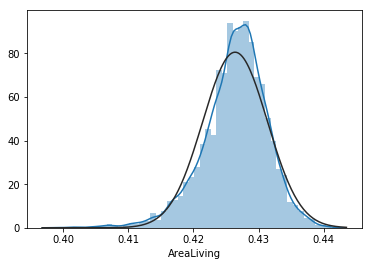

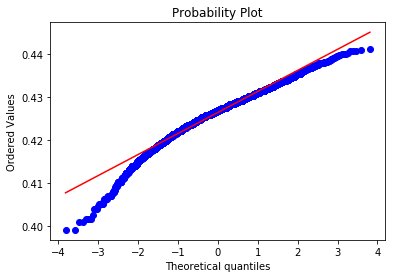

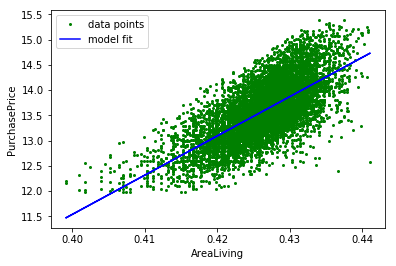

In [8]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['AreaLiving'].value_counts()
dataframe['AreaLiving'].isnull().sum()
dataframe['AreaLiving'] = np.log1p(dataframe['AreaLiving'])
sns.distplot(dataframe['AreaLiving'], fit=norm)
plt.savefig(r"AreaLiving.png")
fig = plt.figure()
res = stats.probplot(dataframe['AreaLiving'], plot=plt)
plt.savefig(r"AreaLiving_stats.png")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(dataframe['AreaLiving']).reshape((-1, 1))

y = dataframe['PurchasePrice']
model.fit(x, y)
r_sq = model.score(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
new_y = model.coef_*x + model.intercept_


fig = plt.figure()
plt.plot(dataframe['AreaLiving'],dataframe['PurchasePrice'],'go', markersize=2,label='data points')
plt.plot(x,new_y, 'b-',label ='model fit')
plt.ylabel('PurchasePrice')
plt.xlabel('AreaLiving')

plt.legend(loc='upper left')

plt.savefig(r"PurchasepriceAreaLiving.png")

intercept: 13.634960285754193
slope: [-0.28292681]


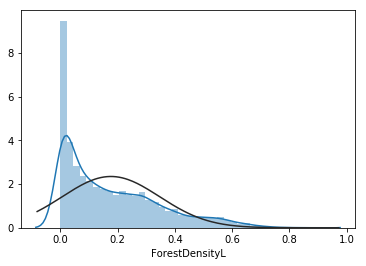

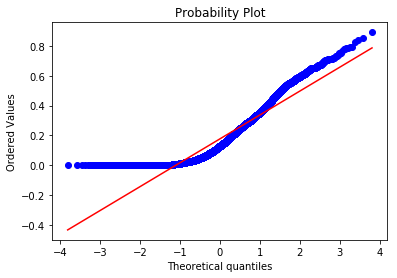

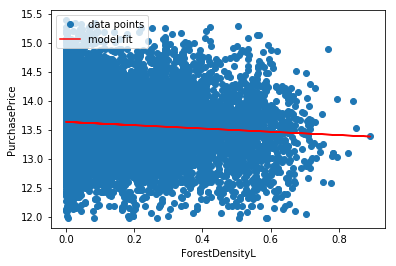

In [43]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['ForestDensityL'].value_counts()
dataframe['ForestDensityL'].isnull().sum()
dataframe['ForestDensityL'] = dataframe['ForestDensityL']
sns.distplot(dataframe['ForestDensityL'], fit=norm)
plt.savefig(r"ForestDensityL.png")
fig = plt.figure()
res = stats.probplot(dataframe['ForestDensityL'], plot=plt)
plt.savefig(r"ForestDensityL.png")

from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(dataframe['ForestDensityL']).reshape((-1, 1))

y = dataframe['PurchasePrice']
model.fit(x, y)
r_sq = model.score(x, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
new_y = model.coef_*x + model.intercept_


fig = plt.figure()
plt.plot(dataframe['ForestDensityL'],dataframe['PurchasePrice'],'o', label='data points')
plt.plot(x,new_y, 'r-',label ='model fit')
plt.ylabel('PurchasePrice')
plt.xlabel('ForestDensityL')
plt.legend(loc='upper left')

plt.savefig(r"PurchasepriceForestDensityL.png")

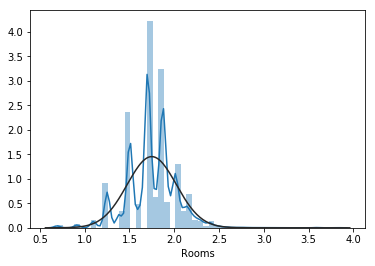

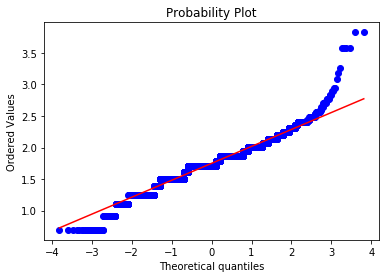

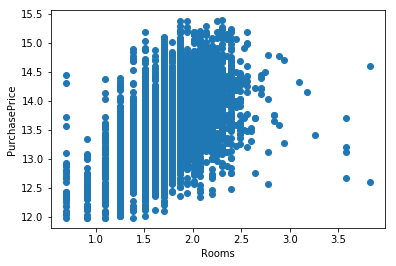

In [47]:
from scipy.stats import norm, skew
from scipy.special import boxcox1p
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['Rooms'].value_counts()
dataframe['Rooms'].isnull().sum()
dataframe['Rooms'] = np.log1p(dataframe['Rooms'])
#dataframe['Rooms'] = boxcox1p(dataframe['Rooms'],0.15)
sns.distplot(dataframe['Rooms'], fit=norm)
plt.savefig(r"Rooms")
fig = plt.figure()
res = stats.probplot(dataframe['Rooms'], plot=plt)
plt.savefig(r"Rooms.png")
fig = plt.figure()
plt.plot(dataframe['Rooms'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('Rooms')
plt.savefig(r"PurchasePriceRooms.png")

1


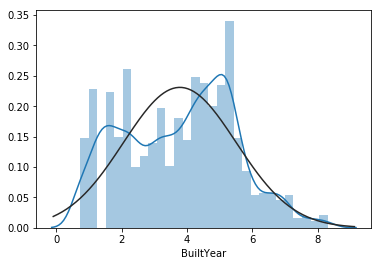

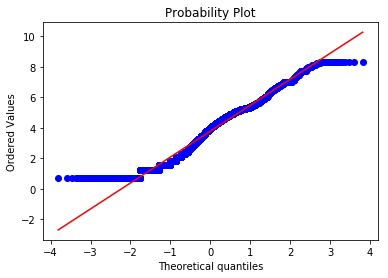

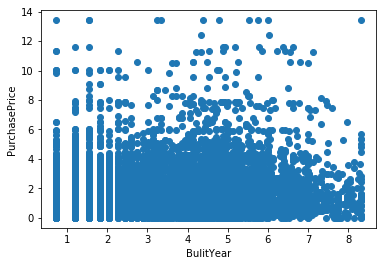

In [48]:
from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew 
from scipy.special import boxcox1p

dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['BuiltYear']=np.array(dataframe['BuiltYear'],dtype=np.float32)
dataframe['BuiltYear']=2019.0-dataframe['BuiltYear']
dataframe['BuiltYear']=boxcox1p(dataframe['BuiltYear'],0.15)
dataframe['BuiltYear'].value_counts()
dataframe['BuiltYear'].isnull().sum()   
#dataframe['BuiltYear'] =dataframe['BuiltYear']
print('1')
sns.distplot(dataframe['BuiltYear'], fit=norm)
plt.savefig(r"BulitYear.png")
fig = plt.figure()
res = stats.probplot(dataframe['BuiltYear'], plot=plt)
plt.savefig(r"BulitYear.png")
fig = plt.figure()
plt.plot(dataframe['BuiltYear'],dataframe['gde_empty_apartments'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('BulitYear')
plt.savefig(r"PurchasepriceBulitYear.png")


1


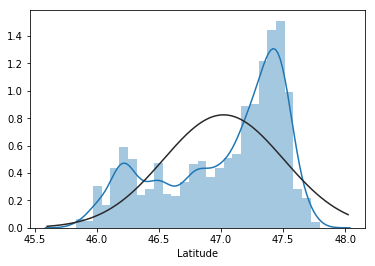

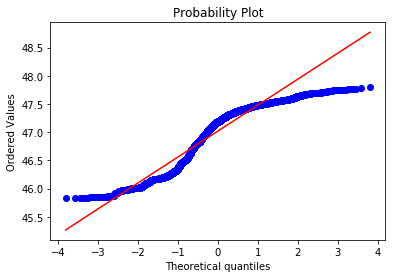

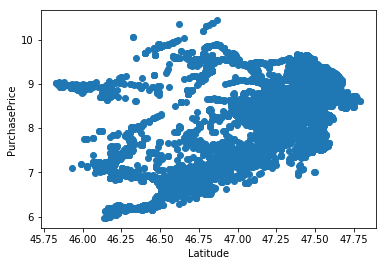

In [45]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['Latitude']=np.array(dataframe['Latitude'],dtype=np.float32)
dataframe['Latitude']=dataframe['Latitude']
#dataframe['Latitude']=np.log1p(dataframe['Latitude'])
dataframe['Latitude'].value_counts()
dataframe['Latitude'].isnull().sum()   
#dataframe['BuiltYear'] =dataframe['BuiltYear']
print('1')
sns.distplot(dataframe['Latitude'], fit=norm)
plt.savefig(r"Latitude.png")
fig = plt.figure()
res = stats.probplot(dataframe['Latitude'], plot=plt)
plt.savefig(r"Latitude.png")
fig = plt.figure()
plt.plot(dataframe['Latitude'],dataframe['Longitude'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('Latitude')
plt.savefig(r"PurchasepriceLatitude.png")

1


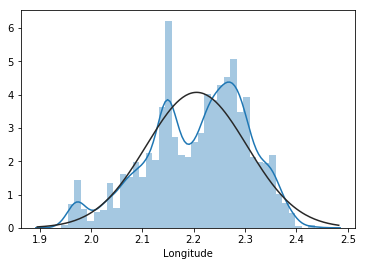

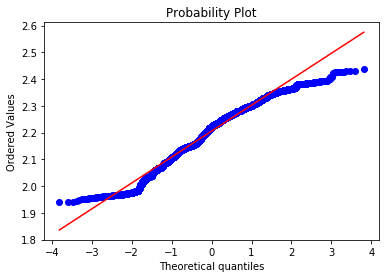

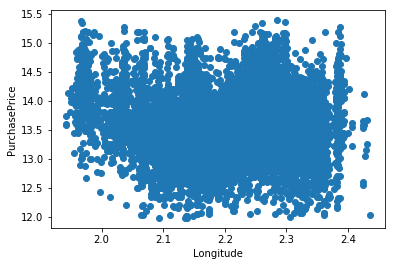

In [55]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['Longitude']=np.array(dataframe['Longitude'],dtype=np.float32)
dataframe['Longitude']=dataframe['Longitude']
dataframe['Longitude']=np.log1p(dataframe['Longitude'])
dataframe['Longitude'].value_counts()
dataframe['Longitude'].isnull().sum()   
#dataframe['BuiltYear'] =dataframe['BuiltYear']
print('1')
sns.distplot(dataframe['Longitude'], fit=norm)
plt.savefig(r"Longitude.png")
fig = plt.figure()
res = stats.probplot(dataframe['Longitude'], plot=plt)
plt.savefig(r"Longitude.png")
fig = plt.figure()
plt.plot(dataframe['Longitude'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('Longitude')
plt.savefig(r"Purchasepricelongitude.png")

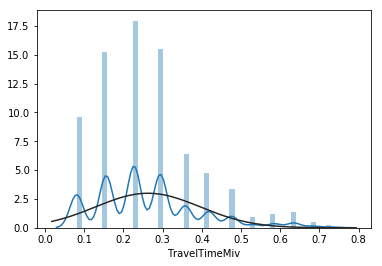

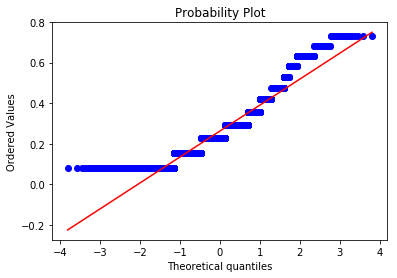

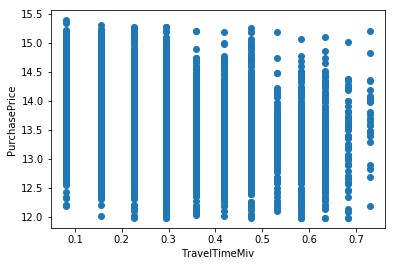

In [79]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['TravelTimeMiv'].value_counts()
dataframe['TravelTimeMiv'].isnull().sum()
dataframe['TravelTimeMiv'] =boxcox1p(dataframe['TravelTimeMiv'],0.15)
sns.distplot(dataframe['TravelTimeMiv'], fit=norm)
plt.savefig(r"TravelTimeMiv")
fig = plt.figure()
res = stats.probplot(dataframe['TravelTimeMiv'], plot=plt)
plt.savefig(r"TravelTimeMiv.png")
fig = plt.figure()
plt.plot(dataframe['TravelTimeMiv'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('TravelTimeMiv')
plt.savefig(r"PurchasePriceTravelTimeMiv.png")

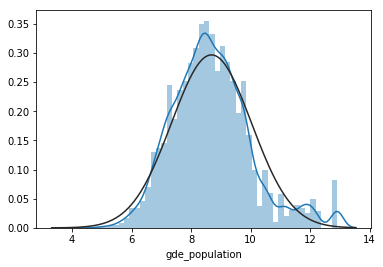

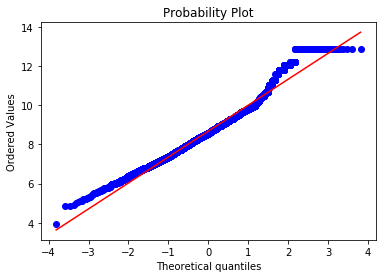

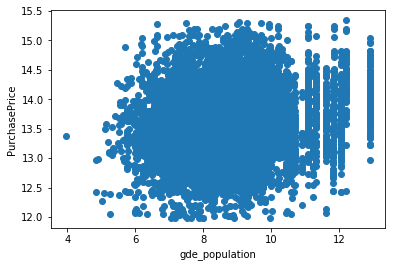

In [9]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['gde_population'].value_counts()
dataframe['gde_population'].isnull().sum()
#dataframe['gde_population'] = np.log1p(dataframe['gde_population'])
sns.distplot(dataframe['gde_population'], fit=norm)
plt.savefig(r"gde_population")
fig = plt.figure()
res = stats.probplot(dataframe['gde_population'], plot=plt)
plt.savefig(r"gde_population.png")
fig = plt.figure()
plt.plot(dataframe['gde_population'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('gde_population')
plt.savefig(r"PurchasePricegde_population.png")

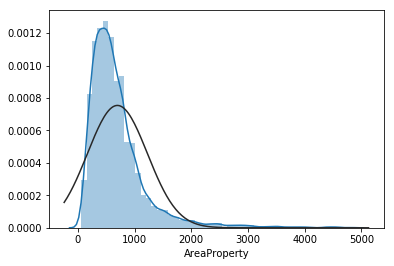

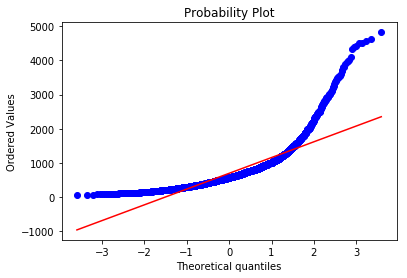

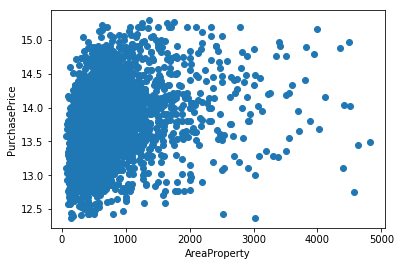

In [50]:
dataframe = pd.DataFrame(dataX_small, columns=names)

dataframe.drop(dataframe[(dataframe['AreaProperty']<1)].index,inplace=True)
Data.reset_index(drop=True, inplace=True)

#dataframe['AreaProperty'] = np.log1p(dataframe['AreaProperty'])
dataframe['AreaProperty'].value_counts()
dataframe['AreaProperty'].isnull().sum()
sns.distplot(dataframe['AreaProperty'], fit=norm)
plt.savefig(r"AreaProperty")
fig = plt.figure()
res = stats.probplot(dataframe['AreaProperty'], plot=plt)
plt.savefig(r"AreaProperty.png")
fig = plt.figure()
plt.plot(dataframe['AreaProperty'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('AreaProperty')
plt.savefig(r"PurchasePriceAreaProperty.png")

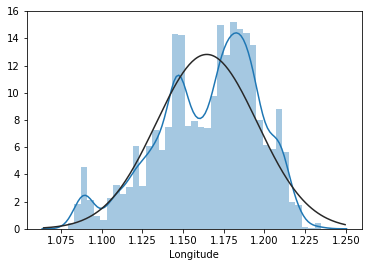

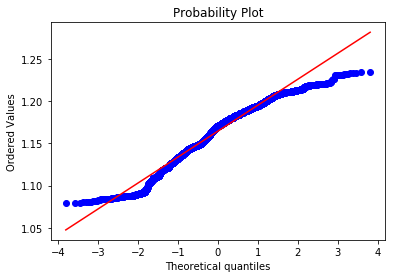

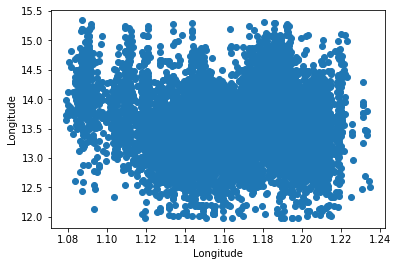

In [17]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['Longitude'].value_counts()
dataframe['Longitude'].isnull().sum()
dataframe['Longitude'] = np.log1p(dataframe['Longitude'])
sns.distplot(dataframe['Longitude'], fit=norm)
plt.savefig(r"Longitude")
fig = plt.figure()
res = stats.probplot(dataframe['Longitude'], plot=plt)
plt.savefig(r"Longitude.png")
fig = plt.figure()
plt.plot(dataframe['Longitude'],dataframe['PurchasePrice'],'o')
plt.ylabel('Longitude')
plt.xlabel('Longitude')
plt.savefig(r"PurchasePriceLongitude.png")

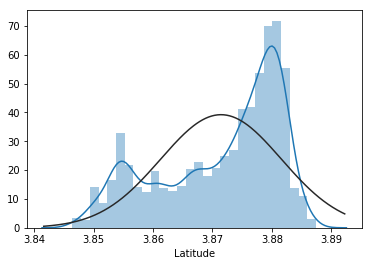

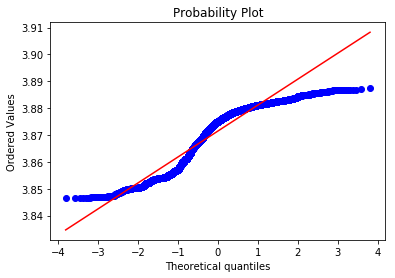

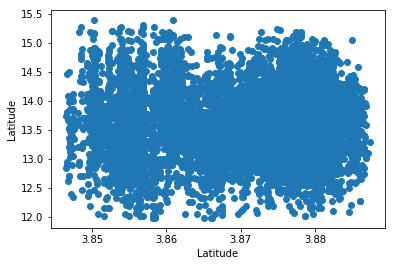

In [20]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['Latitude'].value_counts()
dataframe['Latitude'].isnull().sum()
#dataframe['Latitude'] = np.log1p(dataframe['Latitude'])
sns.distplot(dataframe['Latitude'], fit=norm)
plt.savefig(r"Latitude")
fig = plt.figure()
res = stats.probplot(dataframe['Latitude'], plot=plt)
plt.savefig(r"Latitude.png")
fig = plt.figure()
plt.plot(dataframe['Latitude'],dataframe['PurchasePrice'],'o')
plt.ylabel('Latitude')
plt.xlabel('Latitude')
plt.savefig(r"PurchasePriceLatitude.png")

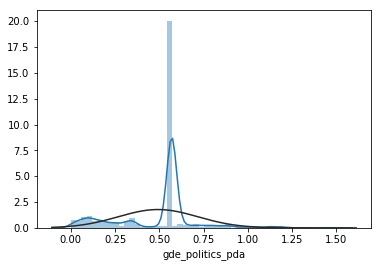

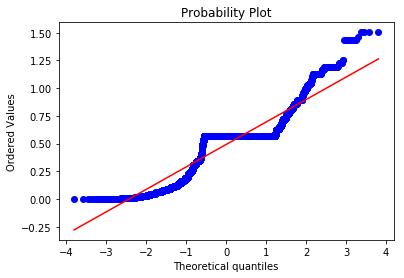

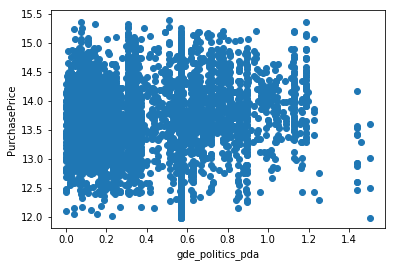

In [10]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['gde_politics_pda'].value_counts()
dataframe['gde_politics_pda'].isnull().sum()
dataframe['gde_politics_pda'] = np.log1p(dataframe['gde_politics_pda'])
sns.distplot(dataframe['gde_politics_pda'], fit=norm)
plt.savefig(r"gde_politics_pda")
fig = plt.figure()
res = stats.probplot(dataframe['gde_politics_pda'], plot=plt)
plt.savefig(r"gde_politics_pda.png")
fig = plt.figure()
plt.plot(dataframe['gde_politics_pda'],dataframe['PurchasePrice'],'o')
plt.ylabel('PurchasePrice')
plt.xlabel('gde_politics_pda')
plt.savefig(r"gde_politics_pda.png")

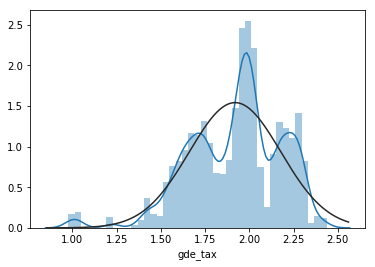

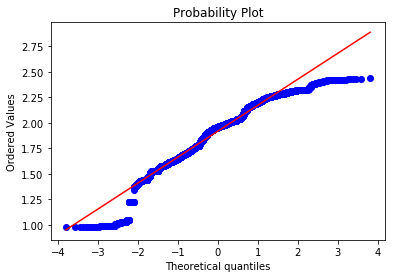

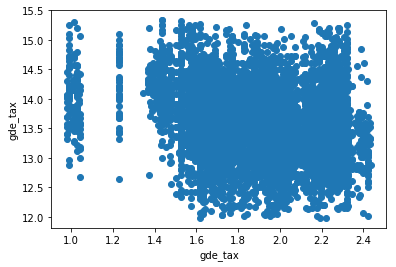

In [67]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['gde_tax'].value_counts()
dataframe['gde_tax'].isnull().sum()
dataframe['gde_tax'] = np.log1p(dataframe['gde_tax'])
sns.distplot(dataframe['gde_tax'], fit=norm)
plt.savefig(r"gde_tax")
fig = plt.figure()
res = stats.probplot(dataframe['gde_tax'], plot=plt)
plt.savefig(r"gde_tax.png")
fig = plt.figure()
plt.plot(dataframe['gde_tax'],dataframe['PurchasePrice'],'o')
plt.ylabel('gde_tax')
plt.xlabel('gde_tax')
plt.savefig(r"PurchasePricegde_tax.png")

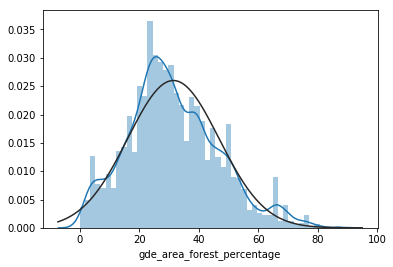

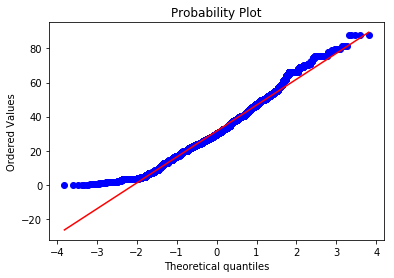

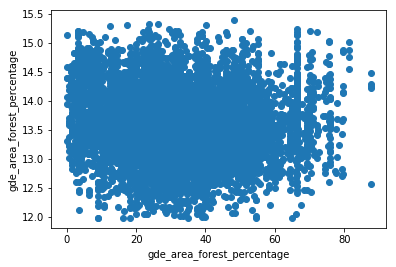

In [24]:
dataframe = pd.DataFrame(dataX_small, columns=names)
dataframe['gde_area_forest_percentage'].value_counts()
dataframe['gde_area_forest_percentage'].isnull().sum()
dataframe['gde_area_forest_percentage'] = dataframe['gde_area_forest_percentage']
sns.distplot(dataframe['gde_area_forest_percentage'], fit=norm)
plt.savefig(r"gde_area_forest_percentage")
fig = plt.figure()
res = stats.probplot(dataframe['gde_area_forest_percentage'], plot=plt)
plt.savefig(r"gde_area_forest_percentage.png")
fig = plt.figure()
plt.plot(dataframe['gde_area_forest_percentage'],dataframe['PurchasePrice'],'o')
plt.ylabel('gde_area_forest_percentage')
plt.xlabel('gde_area_forest_percentage')
plt.savefig(r"PurchasePricegde_area_forest_percentage.png")

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


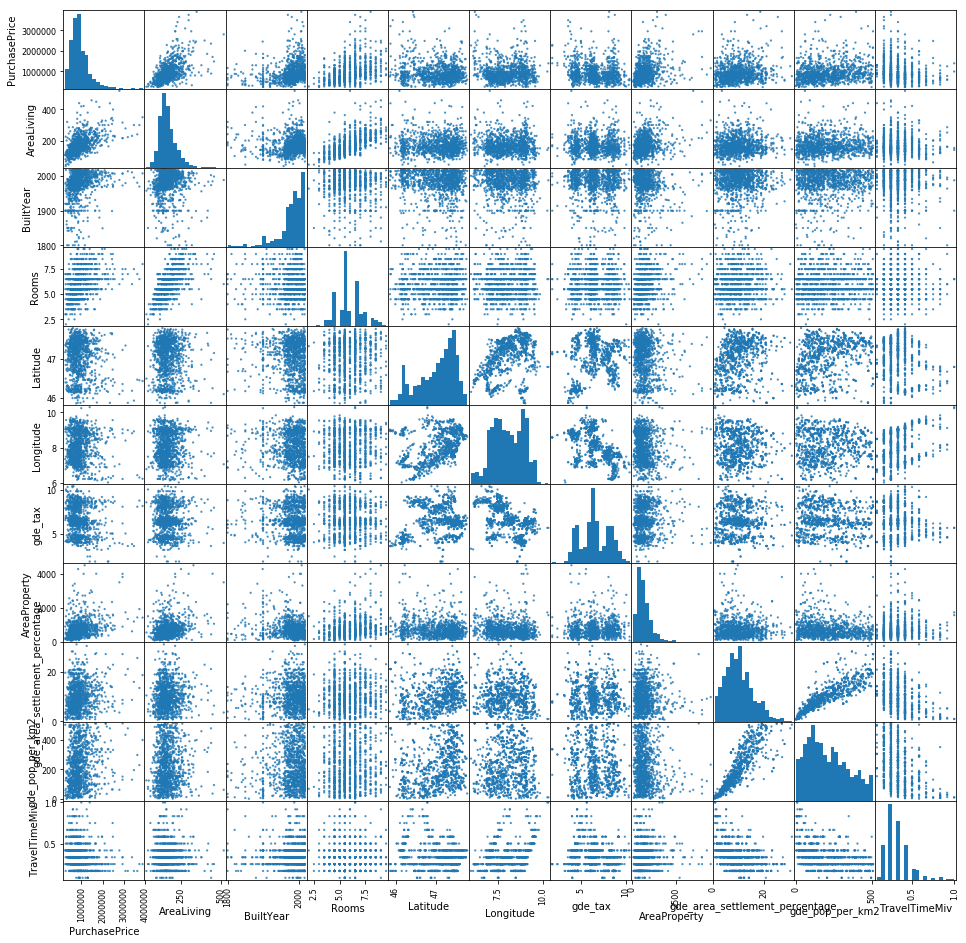

In [4]:
#Visualize the data in a scatter matrix using the plot method plotting.scatter_matrix of the pandas dataframe.
import sklearn
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/lilian/Desktop/project/project data/train.csv",encoding = "ISO-8859-1")
Data = pd.DataFrame(data)

#pick up some interesting columns for plotting the scatter matrix. 
#X = Data[['PurchasePrice','AreaLiving','Rooms', 'gde_tax','NoisePollutionRoadL',
          #'distanceToTrainStation','FloorNumber','WorkplaceDensityL','AreaProperty']]
X=Data[['PurchasePrice','AreaLiving','BuiltYear', 'Rooms','Latitude', 'Longitude','gde_tax','AreaProperty',
 'gde_area_settlement_percentage', 'gde_pop_per_km2','TravelTimeMiv']]

names = X.columns

N_columns = len(names)

#Choose a random smaple of N of each data column for plotting. 
N = 5000
dataX = np.array(X)
pairs = list(zip(dataX))
X1 = random.sample(pairs, N)
dataX_small = np.array(X1)
dataX_small = dataX_small.reshape(N,N_columns)

#Build a small dataframe for the plot. 
dataframe = pd.DataFrame(dataX_small, columns=names)

#choose the rooms < 20 & Area proproperty >20 as it will make the plot more concentrate. 
newdata= dataframe.ix[dataframe.Rooms <10]
newdata1=newdata.ix[dataframe.AreaProperty >20]
newdata2 =newdata1.ix[dataframe.gde_pop_per_km2<510]
#newdata1=newdata.ix[dataframe.AreaProperty >20]
#newdata1 =dataframe
grr = pd.plotting.scatter_matrix(newdata2, figsize=(16, 16), marker='o',
                                 hist_kwds={'bins': 20}, s=5, alpha=.8)
plt.savefig(r"scatter_matrix1.png")

Index(['PurchasePrice', 'AreaLiving', 'Rooms', 'AreaProperty',
       'gde_area_settlement_percentage', 'gde_pop_per_km2', 'Zip',
       'RealEstateTypeId'],
      dtype='object')


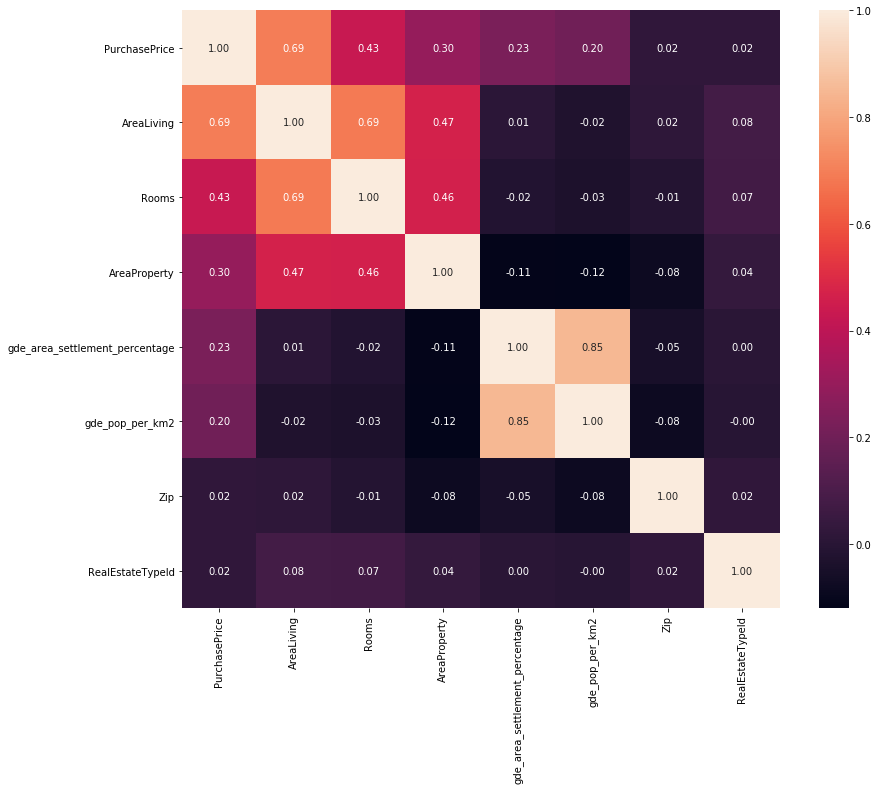

In [52]:
corrmat = X.corr()
k = 11
cols = corrmat.nlargest(8, 'PurchasePrice')['PurchasePrice'].index
print(cols)
cm = X[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig(r"PurchasePricecorr.png")
plt.show()

Index(['PurchasePrice', 'gde_workers_total', 'gde_politics_pda',
       'gde_politics_rights', 'Renovationyear', 'FloorNumber',
       'gde_politics_evp', 'gde_politics_bdp'],
      dtype='object')


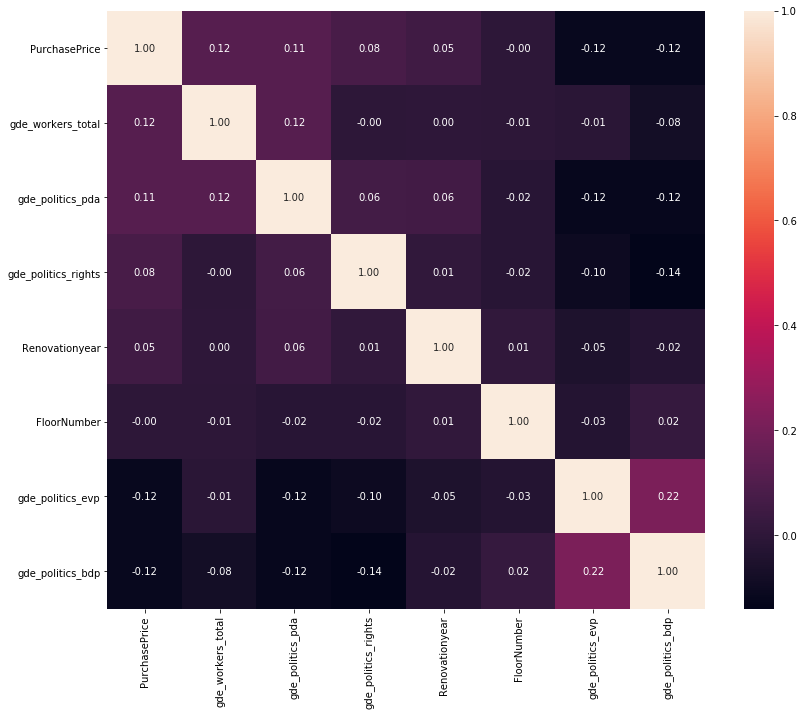

In [24]:
 X1= Data[['PurchasePrice', 'Renovationyear', 'gde_politics_pda', 'FloorNumber',
         'gde_politics_bdp','gde_politics_rights','gde_politics_evp','StreetAndNr','gde_workers_total']].fillna(0)
corrmat = X1.corr()
#k = 11
cols = corrmat.nlargest(10, 'PurchasePrice')['PurchasePrice'].index
print(cols)
cm = X1[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.savefig(r"PurchasePricecorr1.png")
plt.show()